# Sheet 5

Julian Kusch, Tim Weinreich, 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## 1 Bayes: Signal or Noise?

$$ p(\text{gamma ray | target direction}) = \frac{p(\text{target direction | gamma ray}) \cdot p(\text{gamma ray})}{p(\text{background})} = \frac{0.95 \cdot 0.1}{0.9} \approx 0.11 $$

## 2 Bayes Classifier


$$
L(y, \hat{y}) =
\begin{bmatrix}
0 & 1 \\
10 & 0
\end{bmatrix}
$$

where:
- $ y = 0 $ is the true class, and $ \hat{y} = 0 $ or $ \hat{y} = 1 $ are the predicted classes.
- $ y = 1 $ is the true class, and $ \hat{y} = 0 $ or $ \hat{y} = 1 $ are the predicted classes.



With $ P(y = 1 | x) = p(x) $ and $ P(y = 0 | x) = 1 - p(x) $ we calculate the conditional risk $ R(\hat{y} | x) $ for each possible predicted label $ \hat{y} $:

1. **For $ \hat{y} = 0 $:**
   $$
   R(0 | x) = L(0, 0) \cdot P(y = 0 | x) + L(1, 0) \cdot P(y = 1 | x) = 0 \cdot (1 - p(x)) + 10 \cdot p(x) = 10 \cdot p(x)
   $$

2. **For $ \hat{y} = 1 $:**
   $$
   R(1 | x) = L(0, 1) \cdot P(y = 0 | x) + L(1, 1) \cdot P(y = 1 | x) = 1 \cdot (1 - p(x)) + 0 \cdot p(x) = 1 - p(x)
   $$

To minimize the conditional risk, choose $ \hat{y} = 0 $ if $ R(0 | x) < R(1 | x) $, and $ \hat{y} = 1 $ otherwise.

Thus, we need:
$$
10 \cdot p(x) < 1 - p(x)
$$

Rearrange this inequality:
$$
11 \cdot p(x) < 1 \quad \Rightarrow \quad p(x) < \frac{1}{11}
$$

The optimal Bayes classifier is:
$$
\hat{y} =
\begin{cases}
0 & \text{if } p(x) < \frac{1}{11} \\
1 & \text{if } p(x) \geq \frac{1}{11}
\end{cases}
$$

This asymmetric loss matrix is appropriate in situations where the consequences of a false negative (predicting $ y = 0 $ when $ y = 1 $) are much more severe than a false positive (predicting $ y = 1 $ when $ y = 0 $).


## 3 QDA
### (a)

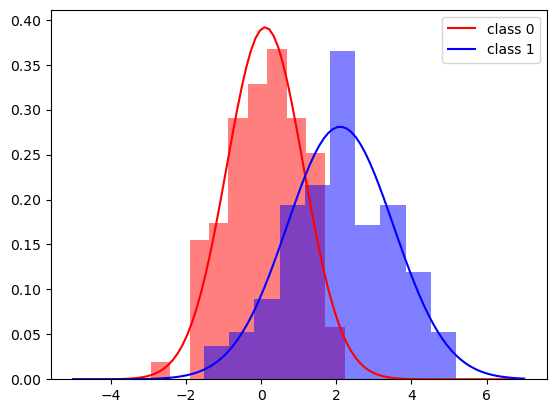

In [24]:
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

x0, x1 = pts[labels == 0], pts[labels == 1]
plt.hist(x0, bins=10, alpha=0.5, density=True, color='r')
plt.hist(x1, bins=10, alpha=0.5, density=True, color='b')

mean0, mean1 = np.mean(x0), np.mean(x1)
var0, var1 = np.var(x0), np.var(x1)

def gaussian(x, mean, var):
    return np.exp(-0.5*(x-mean)**2/var)/np.sqrt(2*np.pi*var)

x = np.linspace(-5, 7, 100)

plt.plot(x, gaussian(x, mean0, var0), label='class 0', color='r')
plt.plot(x, gaussian(x, mean1, var1), label='class 1', color='b')
plt.legend()

### (b)

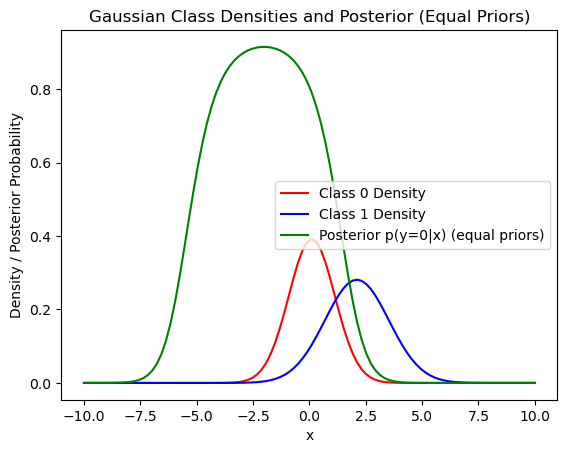

In [26]:
x = np.linspace(-10, 10, 100)

like0 = gaussian(x, mean0, var0)
like1 = gaussian(x, mean1, var1)

prior0, prior1 = 0.5, 0.5

post0 = like0*prior0/(like0*prior0 + like1*prior1)

plt.plot(x, like0, label="Class 0 Density", color="r")
plt.plot(x, like1, label="Class 1 Density", color="b")
plt.plot(x, post0, label="Posterior p(y=0|x) (equal priors)", color="green")
plt.title("Gaussian Class Densities and Posterior (Equal Priors)")
plt.xlabel("x")
plt.ylabel("Density / Posterior Probability")
plt.legend()

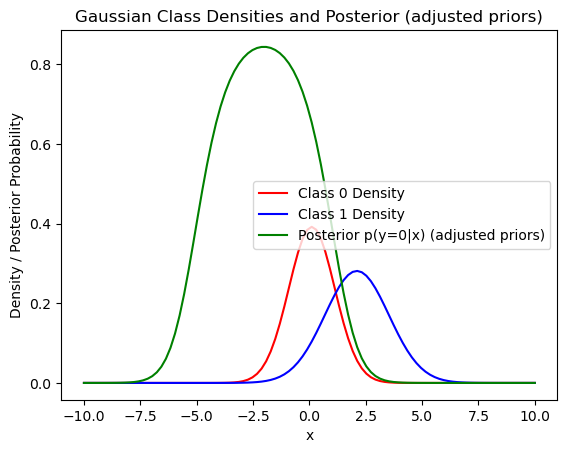

In [28]:
prior0, prior1 = 1/3, 2/3

post0 = like0*prior0/(like0*prior0 + like1*prior1)

plt.plot(x, like0, label="Class 0 Density", color="r")
plt.plot(x, like1, label="Class 1 Density", color="b")
plt.plot(x, post0, label="Posterior p(y=0|x) (adjusted priors)", color="green")
plt.title("Gaussian Class Densities and Posterior (adjusted priors)")
plt.xlabel("x")
plt.ylabel("Density / Posterior Probability")
plt.legend()

## 4 Trees and Random Forests

### a)


$$
\text{Misclassification Rate} = 1 - \max(p(y = c))
$$


$$
\text{Gini} = 1 - \sum_{c=1}^2 p(y = c)^2
$$

$$
\text{Entropy} = -\sum_{c=1}^2 p(y = c) \log_2 p(y = c)
$$


1. Node 1 (300, 100):
   \begin{align*}
   \text{Misclassification Rate} &= 1 - 0.75 = 0.25 \\
   \text{Gini Impurity} &= 1 - (0.75^2 + 0.25^2) = 1 - (0.5625 + 0.0625) = 0.375 \\
   \text{Entropy} &= -(0.75 \log_2 0.75 + 0.25 \log_2 0.25) \approx 0.811
   \end{align*}

2. Node 2 (100, 300):
   \begin{align*}
   \text{Misclassification Rate} &= 1 - 0.75 = 0.25 \\
   \text{Gini Impurity} &= 1 - (0.25^2 + 0.75^2) = 0.375 \\
   \text{Entropy} &= -(0.25 \log_2 0.25 + 0.75 \log_2 0.75) \approx 0.811
   \end{align*}

3. Weighted Averages for Split A:
   \begin{align*}
   \text{Misclassification Rate} &= 0.25 \times \frac{400}{800} + 0.25 \times \frac{400}{800} = 0.25 \\
   \text{Gini Impurity} &= 0.375 \times \frac{400}{800} + 0.375 \times \frac{400}{800} = 0.375 \\
   \text{Entropy} &= 0.811 \times \frac{400}{800} + 0.811 \times \frac{400}{800} \approx 0.811
   \end{align*}

1. Node 1 (200, 0):
   \begin{align*}
   \text{Misclassification Rate} &= 1 - 1 = 0 \\
   \text{Gini Impurity} &= 1 - (1^2 + 0^2) = 0 \\
   \text{Entropy} &= -(1 \cdot \log_2 1 + 0 \cdot \log_2 0) = 0
   \end{align*}

2. Node 2 (200, 400):
   \begin{align*}
   \text{Misclassification Rate} &= 1 - 0.667 \approx 0.333 \\
   \text{Gini Impurity} &= 1 - (0.333^2 + 0.667^2) = 1 - (0.111 + 0.444) = 0.444 \\
   \text{Entropy} &= -(0.333 \log_2 0.333 + 0.667 \log_2 0.667) \approx 0.918
   \end{align*}

3. Weighted Averages for Split B:
   \begin{align*}
   \text{Misclassification Rate} &= 0 \times \frac{200}{800} + 0.333 \times \frac{600}{800} \approx 0.25 \\
   \text{Gini Impurity} &= 0 \times \frac{200}{800} + 0.444 \times \frac{600}{800} = 0.333 \\
   \text{Entropy} &= 0 \times \frac{200}{800} + 0.918 \times \frac{600}{800} \approx 0.688
   \end{align*}



- Misclassification Rate: Both splits have the same misclassification rate of 0.25.
- Gini Impurity: Split B has a lower Gini impurity (0.333 vs. 0.375), so it would be preferred by the Gini criterion.
- Entropy: Split B also has a lower entropy (0.688 vs. 0.811), so it would be preferred by the entropy criterion.


Overall, Split B would be the preferred split based on both Gini impurity and entropy.



### (b)

In [ ]:
# load the data
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# TODO: Sort the points to easily split them

sorted_pts = np.sort(pts)
sorted_labels = labels[np.argsort(pts)]

# TODO: Implement or find implementation for Gini impurity, entropy and misclassifcation rate

def probabilities(partition):
    # divide counts by size of dataset to get cluster probabilites
    return np.unique(partition, return_counts=True)[1] / len(partition)

def gini_impurity(partition):
    p = probabilities(partition)
    return 1 - np.sum(p**2)

def entropy(partition):
    p = probabilities(partition)
    return -np.sum(p * np.log2(p))

def misclassification_rate(partition):
    p = probabilities(partition)
    return 1 - np.max(p)

def compute_split_measure(l, l0, l1, method):
    p0 = probabilities(l0)
    p1 = probabilities(l1)
    p = probabilities(l)
    return method(p) - (len(l0) * method(p0) + len(l1) * method(p1)) / (len(l))

# TODO: Iterate over the possible splits, evaulating and saving the three criteria for each one

# TODO: Then, Compute the split that each criterion favours and visualize them 
#       (e.g. with a histogram for each class and vertical lines to show the splits)









### (c)

In [7]:
# load the dijet data
features = np.load('data/dijet_features_normalized.npy')
labels = np.load('data/dijet_labels.npy')

# TODO: define train, val and test splits as specified (make sure to shuffle the data before splitting it!)

In [8]:
from sklearn.ensemble import RandomForestClassifier

# TODO: train a random forest classifier for each combination of specified hyperparameters 
#       and evaluate the performances on the validation set.

In [9]:
# TODO: for your preferred configuration, evaluate the performance of the best configuration on the test set